# Modifications de résultats des sondages

## Import préliminaires des librairies

In [22]:
%pylab inline
# Command OS
import os

# Regex
import re

# Calcul and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns

# Dealing with specific representation of number
# Aka commat in french in numbers
import locale
from locale import atof





Populating the interactive namespace from numpy and matplotlib


## Import du dataframe

## Calcul de l'erreur à 95% de confiance

In [23]:
def error_p(p,n=1000,Za=1.96):
    return np.sqrt(p*(1-p)/n)*Za
error_p(0.5,int(1900/9))

0.0674659823005084

## Calcul de l'intervalle de confiance

In [24]:
def margin_p(p,n=1000,Za=1.96):
    er=error_p(p,n,Za)
    return np.array([p-er,p+er])


In [25]:
def error_in_margin(p,n,variation,Za=1.96,double_margin=True):
    # Compute old values
    old_p=p-variation
    # Compute err
    err=error_p(p/100,n,Za)*100
    # Compute err old values
    old_err=error_p(old_p/100,n,Za)*100
    if double_margin:
        return (np.abs(variation)<=err+old_err) & variation!=0
    else:
        return (np.abs(variation)<=err) & variation!=0


In [26]:
def extract_in_margin(fav,defav,evol_fav,evol_defav,pop_size,double_margin=True):
    # Suppression des valeurs sans variation
    fav=fav[evol_fav!=0]
    defav=defav[evol_defav!=0]
    pop_size_fav=pop_size[evol_fav!=0]
    pop_size_defav=pop_size[evol_defav!=0]
    evol_fav=evol_fav[evol_fav!=0]
    evol_defav=evol_defav[evol_defav!=0]

    # Calcul des erreurs
    err_fav=error_p(fav/100,pop_size_fav)*100
    err_defav=error_p(defav/100,pop_size_defav)*100

    # Calcul des anciennes valeurs
    old_fav=fav-evol_fav
    old_defav=defav-evol_defav
    # Calcul des erreurs anciennes valeurs
    err_old_fav=error_p(old_fav/100,pop_size_fav)*100
    err_old_defav=error_p(old_defav/100,pop_size_defav)*100
    if double_margin:
        total_fav_in_margin=np.sum(err_fav+err_old_fav>=np.abs(evol_fav))
        total_defav_in_margin=np.sum(err_defav+err_old_defav>=np.abs(evol_defav))
    else:
        total_fav_in_margin=np.sum(err_fav>=np.abs(evol_fav))
        total_defav_in_margin=np.sum(err_defav>=np.abs(evol_defav))
    total_in_margin=total_fav_in_margin+total_defav_in_margin
    total_lines=len(fav)+len(defav)

    return (total_in_margin,total_lines)

In [27]:
filenames=[f.rstrip('.pdf') for f in os.listdir('rapport')]
sum_in_margin=0
total_lines=0
df=pd.read_pickle("data/2020-08-20.p")
data_f=pd.DataFrame(columns=df.columns)
for fn in filenames:
    df=pd.read_pickle("data/{}.p".format(fn))
    # df['Date']=fn
    data_f=pd.concat([data_f,df],ignore_index=True)
    in_margin,nb_lines=extract_in_margin(df['ST Favorable'],df['ST Défavorable'],df['Evolution ST Favorable'],df['Evolution ST Défavorable'],df.Base)
    sum_in_margin+=in_margin
    total_lines+=nb_lines
data_f.Date=data_f.Date.astype('datetime64')
print(sum_in_margin/total_lines)



0.8888888888888888


In [28]:
data_f

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1928.0,5.0,22.0,27.0,32.0,40.0,72.0,1.0,4.0,-4.0,2019-01-19
1,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1928.0,4.0,26.0,30.0,36.0,31.0,67.0,3.0,-1.0,1.0,2019-01-19
2,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1891.0,5.0,23.0,28.0,34.0,37.0,71.0,1.0,1.0,-1.0,2019-02-16
3,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1891.0,3.0,28.0,31.0,36.0,30.0,66.0,3.0,1.0,-1.0,2019-02-16
4,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1929.0,4.0,25.0,29.0,36.0,33.0,69.0,2.0,1.0,-2.0,2019-03-23
5,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1929.0,4.0,29.0,33.0,39.0,25.0,64.0,3.0,2.0,-2.0,2019-03-23
6,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1921.0,5.0,24.0,29.0,33.0,36.0,69.0,2.0,0.0,0.0,2019-04-20
7,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1921.0,4.0,29.0,33.0,36.0,27.0,63.0,4.0,0.0,-1.0,2019-04-20
8,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1946.0,4.0,26.0,30.0,33.0,34.0,67.0,3.0,1.0,-2.0,2019-05-18
9,Edouard PHILIPPE,ENSEMBLE,ENSEMBLE,1946.0,4.0,30.0,34.0,36.0,25.0,61.0,5.0,1.0,-2.0,2019-05-18


# Méthodes pour la visualisation

In [29]:
def vis_inexploitable(df,size_fig=(10,10)):
    fig = plt.figure(figsize=size_fig)
    ax=sns.barplot(x='Inexploitable', y='Inexploitable', data=df, estimator=lambda x: len(x) / len(df) * 100)
    ax.set(ylabel="%")
    ax.set(xlabel="Variations")
    ax.set(xticklabels=['Exploitable', 'Inexploitable'])
    # ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
    fig.savefig('plot.svg')


In [30]:
Nom ='Emmanuel MACRON'
d_margin_err=True

data_f['Inexploitable Favorable']=error_in_margin(data_f['ST Favorable'],data_f["Base"],data_f['Evolution ST Favorable'],double_margin=d_margin_err)
data_f['Inexploitable Défavorable']=error_in_margin(data_f['ST Défavorable'],data_f["Base"],data_f['Evolution ST Défavorable'],double_margin=d_margin_err)
data_f['Erreur Th Favorable']=error_p(data_f['ST Favorable']/100,data_f["Base"])*100
data_f['Erreur Th Défavorable']=error_p(data_f['ST Défavorable']/100,data_f["Base"],)*100
data_f['Inexploitable Favorable'].value_counts()
data_f['Inexploitable Défavorable'].value_counts()
df_inex=pd.DataFrame()
df_inex['Résultats']=pd.concat([data_f['ST Favorable'],data_f['ST Défavorable']])
df_inex['Categorie']=pd.concat([data_f['Categorie'],data_f['Categorie']])
df_inex['Inexploitable']=pd.concat([data_f['Inexploitable Favorable'],data_f['Inexploitable Défavorable']])
df_inex['Nom']=pd.concat([data_f['Nom'],data_f['Nom']])
df_inex['Date']=pd.concat([data_f['Date'],data_f['Date']])
groupe=df_inex[df_inex.Categorie=='ENSEMBLE']

data_f[data_f.Nom==Nom]


,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable
0,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1928.0,5.0,22.0,27.0,32.0,40.0,72.0,1.0,4.0,-4.0,2019-01-19,False,False,1.981736,2.004231
2,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1891.0,5.0,23.0,28.0,34.0,37.0,71.0,1.0,1.0,-1.0,2019-02-16,True,True,2.023744,2.045213
4,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1929.0,4.0,25.0,29.0,36.0,33.0,69.0,2.0,1.0,-2.0,2019-03-23,True,True,2.024968,2.063932
6,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1921.0,5.0,24.0,29.0,33.0,36.0,69.0,2.0,0.0,0.0,2019-04-20,False,False,2.029180,2.068225
8,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1946.0,4.0,26.0,30.0,33.0,34.0,67.0,3.0,1.0,-2.0,2019-05-18,True,True,2.036077,2.089195
10,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1910.0,4.0,26.0,30.0,35.0,32.0,67.0,3.0,0.0,0.0,2019-06-22,False,False,2.055176,2.108792
12,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,996.0,6.0,26.0,32.0,33.0,35.0,68.0,0.0,2.0,1.0,2019-07-18,True,True,2.897049,2.897049
14,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,988.0,5.0,29.0,34.0,35.0,31.0,66.0,0.0,2.0,-2.0,2019-08-22,True,True,2.953854,2.953854
16,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1960.0,6.0,27.0,33.0,35.0,29.0,64.0,3.0,-1.0,-2.0,2019-09-21,True,True,2.081720,2.125051
18,Emmanuel MACRON,ENSEMBLE,ENSEMBLE,1953.0,5.0,29.0,34.0,35.0,29.0,64.0,2.0,1.0,0.0,2019-10-19,True,False,2.100953,2.128856


## Inexploitable global

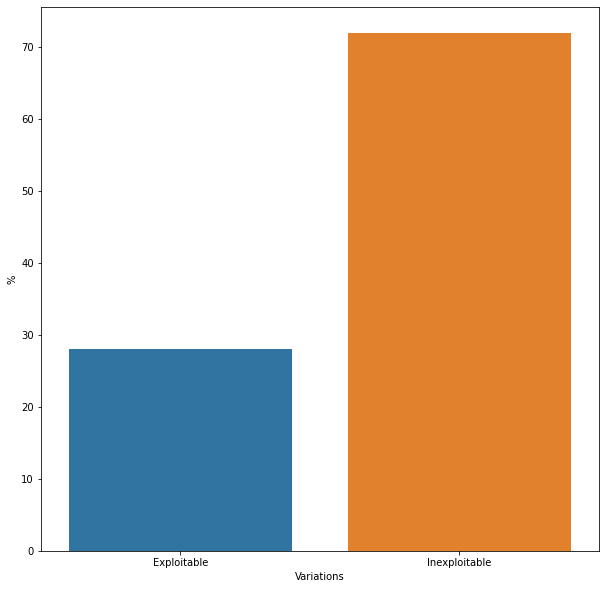

In [31]:
vis_inexploitable(df_inex)

In [32]:
print(df_inex.Inexploitable.value_counts())
df_inex.Inexploitable.value_counts()/len(df_inex)

True     72
False    28
Name: Inexploitable, dtype: int64


True     0.72
False    0.28
Name: Inexploitable, dtype: float64

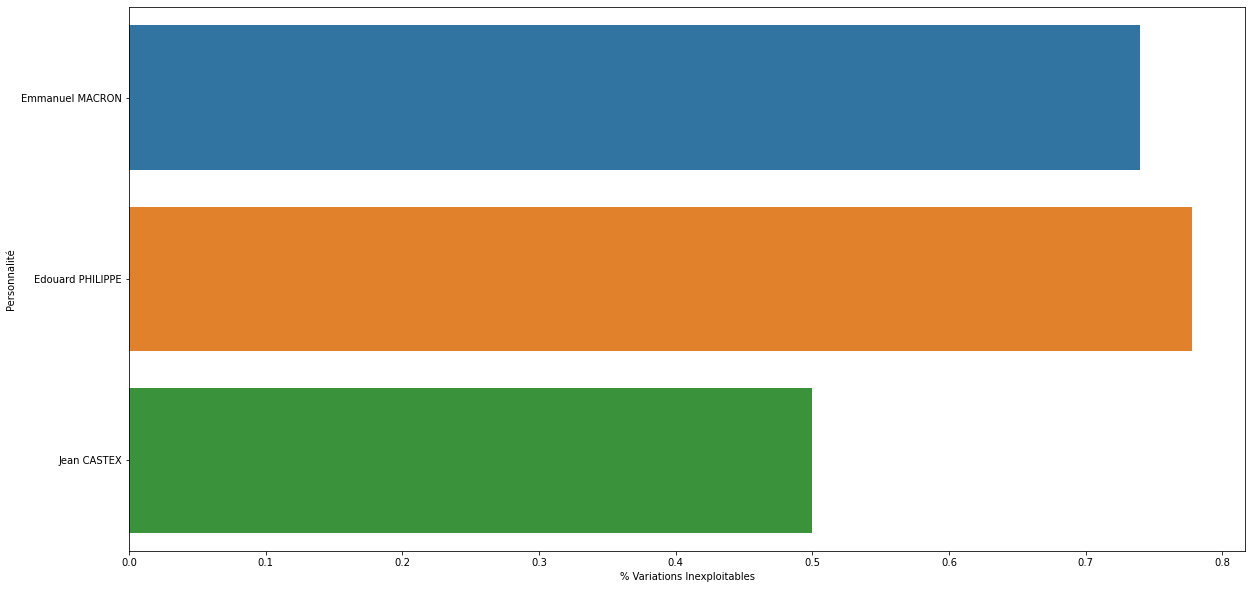

In [33]:
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=df_inex,ci=None
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(xlabel="% Variations Inexploitables")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [34]:
print(groupe['Inexploitable'].value_counts()/len(groupe))
print(groupe['Inexploitable'].value_counts())
# data_f['Inexploitable Défavorable'].value_counts()

True     0.72
False    0.28
Name: Inexploitable, dtype: float64
True     72
False    28
Name: Inexploitable, dtype: int64


# Inexploitable sur le dernier rapport

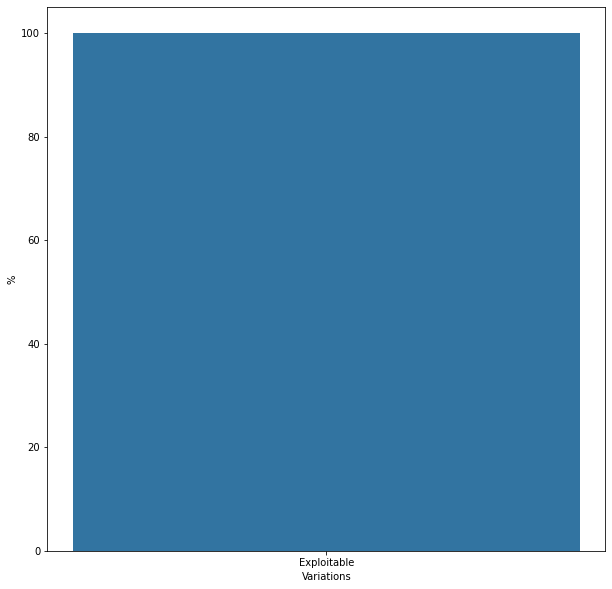

In [35]:
last_date=df_inex.Date.unique().max()
df_last_inex=df_inex[df_inex.Date==last_date]
vis_inexploitable(df_last_inex)

# Variations personnalité

In [36]:
print(data_f.Categorie.value_counts())
data_f[data_f.Categorie=='ENSEMBLE'].Groupe.value_counts()

ENSEMBLE    50
Name: Categorie, dtype: int64


ENSEMBLE    50
Name: Groupe, dtype: int64

In [37]:
nom='Jean CASTEX'
data_pers=data_f[(data_f.Nom==nom) & (data_f.Groupe=='ENSEMBLE')]
data_pers['Erreur favorable']=error_p(data_pers['ST Favorable']/100,data_pers.Base)*100
data_pers['Erreur défavorable']=error_p(data_pers['ST Défavorable']/100,data_pers.Base)*100
data_pers

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable,Erreur favorable,Erreur défavorable
37,Jean CASTEX,ENSEMBLE,ENSEMBLE,974.0,3.0,52.0,55.0,30.0,10.0,40.0,5.0,0.0,0.0,2020-07-16,False,False,3.124382,3.076679,3.124382,3.076679
39,Jean CASTEX,ENSEMBLE,ENSEMBLE,989.0,3.0,45.0,48.0,34.0,12.0,46.0,6.0,-7.0,6.0,2020-08-20,False,True,3.113725,3.106231,3.113725,3.106231
41,Jean CASTEX,ENSEMBLE,ENSEMBLE,1906.0,3.0,42.0,45.0,33.0,13.0,46.0,9.0,-3.0,0.0,2020-09-19,True,False,2.233481,2.237538,2.233481,2.237538
43,Jean CASTEX,ENSEMBLE,ENSEMBLE,1937.0,2.0,37.0,39.0,37.0,15.0,52.0,9.0,-6.0,6.0,2020-10-15,False,False,2.172143,2.224916,2.172143,2.224916
45,Jean CASTEX,ENSEMBLE,ENSEMBLE,1924.0,3.0,36.0,39.0,37.0,19.0,56.0,5.0,0.0,4.0,2020-11-19,False,True,2.179469,2.218063,2.179469,2.218063
47,Jean CASTEX,ENSEMBLE,ENSEMBLE,1936.0,3.0,34.0,37.0,37.0,22.0,59.0,4.0,-2.0,3.0,2020-12-17,True,True,2.150674,2.190894,2.150674,2.190894
49,Jean CASTEX,ENSEMBLE,ENSEMBLE,1913.0,3.0,34.0,37.0,37.0,22.0,59.0,4.0,-2.0,3.0,2021-01-21,True,True,2.163564,2.204025,2.163564,2.204025


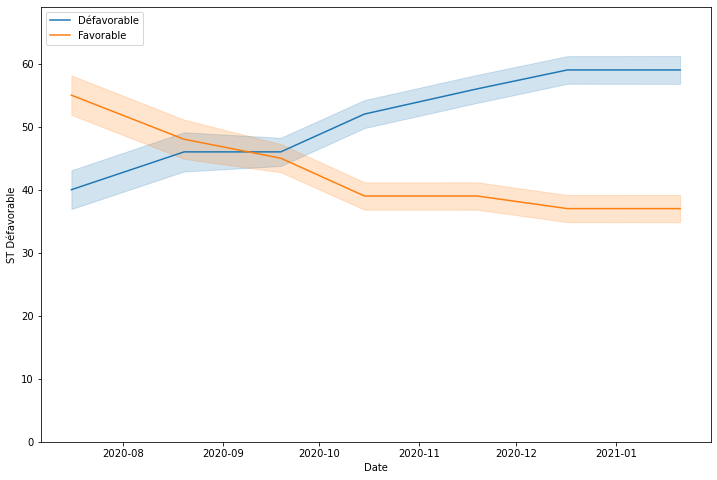

In [38]:


fig = plt.figure(figsize=(12,8))
# ax=sns.lineplot(data=taille_gauche_detail,x='Date',y='Base',hue='Groupe')

ax=sns.lineplot(data=data_pers,x='Date',y='ST Défavorable',label='Défavorable')
current_color=ax.get_lines()[0].get_color()
plt.fill_between(data_pers.Date, data_pers['ST Défavorable']-data_pers['Erreur défavorable'], data_pers['ST Défavorable']+data_pers['Erreur défavorable'],color=current_color, alpha=.2)

sns.lineplot(data=data_pers,x='Date',y='ST Favorable',label='Favorable')
current_color=ax.get_lines()[1].get_color()
plt.fill_between(data_pers.Date, data_pers['ST Favorable']-data_pers['Erreur favorable'], data_pers['ST Favorable']+data_pers['Erreur favorable'],color=current_color, alpha=.2)

# Organise date on ticks automatically
# fig.autofmt_xdate()
ax.set_ylim(0,int(np.max([data_pers['ST Favorable'].max(),data_pers['ST Défavorable'].max()]))+10)
plt.legend(loc='upper left')

# Analyse du dernier rapport

In [39]:
all_dates=np.sort(data_f.Date.unique())
most_recent=all_dates[-1]
scd_most_recent=all_dates[-2]

In [40]:
last_data=data_f[data_f.Date==data_f.Date.max()]
last_inex=pd.DataFrame()
last_inex['Résultats']=pd.concat([last_data['ST Favorable'],last_data['ST Défavorable']])
last_inex['Categorie']=pd.concat([last_data['Categorie'],last_data['Categorie']])
last_inex['Inexploitable']=pd.concat([last_data['Inexploitable Favorable'],last_data['Inexploitable Défavorable']])
last_inex['Nom']=pd.concat([last_data['Nom'],last_data['Nom']])
last_inex

,Résultats,Categorie,Inexploitable,Nom
48,38.0,ENSEMBLE,True,Emmanuel MACRON
49,37.0,ENSEMBLE,True,Jean CASTEX
48,60.0,ENSEMBLE,True,Emmanuel MACRON
49,59.0,ENSEMBLE,True,Jean CASTEX


## Inexploitables global

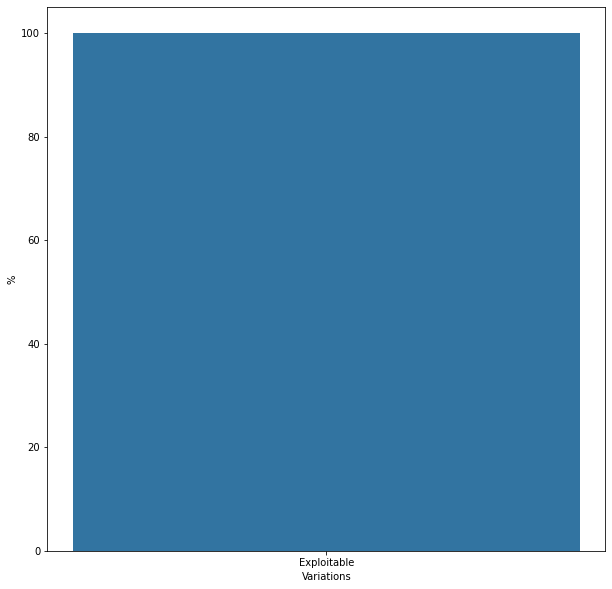

In [41]:
fig = plt.figure(figsize=(10,10))
ax=sns.barplot(x='Inexploitable', y='Inexploitable', data=last_inex, estimator=lambda x: len(x) / len(last_inex) * 100)
ax.set(ylabel="%")
ax.set(xlabel="Variations")
ax.set(xticklabels=['Exploitable', 'Inexploitable'])
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [42]:
print(last_inex.Inexploitable.value_counts())
last_inex.Inexploitable.value_counts()/len(last_inex)

True    4
Name: Inexploitable, dtype: int64


True    1.0
Name: Inexploitable, dtype: float64

## Inexploitable par personnalité

### Inexploitable sur tout le jeu de données

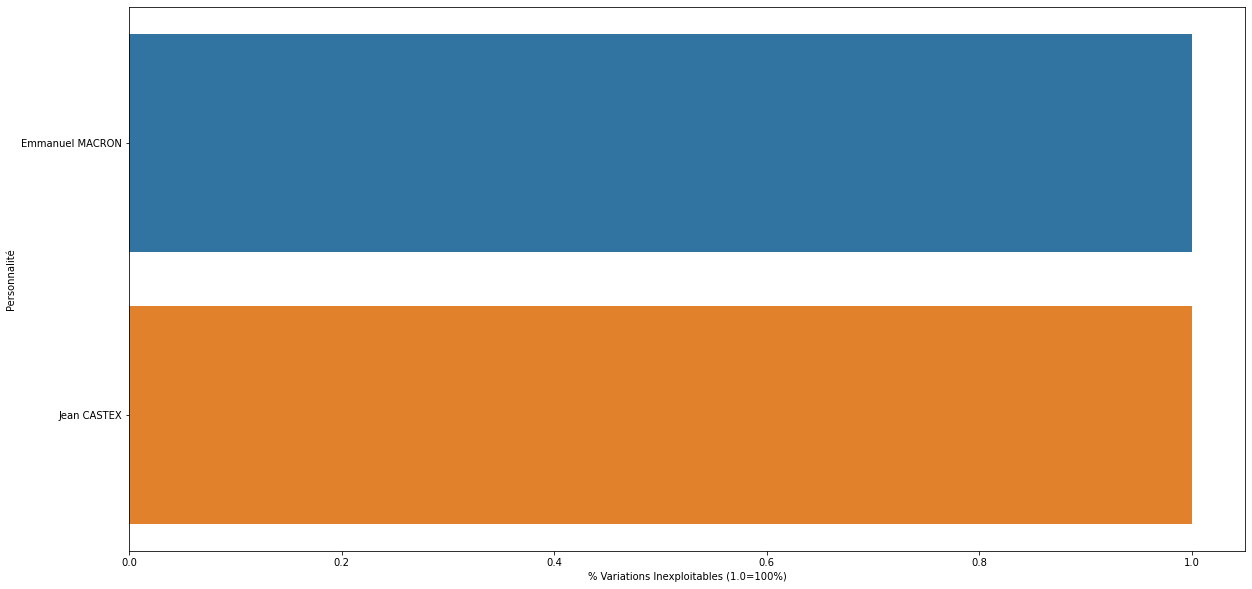

In [43]:
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=last_inex,ci=None
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(xlabel="% Variations Inexploitables (1.0=100%)")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [44]:
print(last_inex['Inexploitable'].value_counts()/len(last_inex))
print(last_inex['Inexploitable'].value_counts())

True    1.0
Name: Inexploitable, dtype: float64
True    4
Name: Inexploitable, dtype: int64


### Inexploitable sur le groupe ENSEMBLE

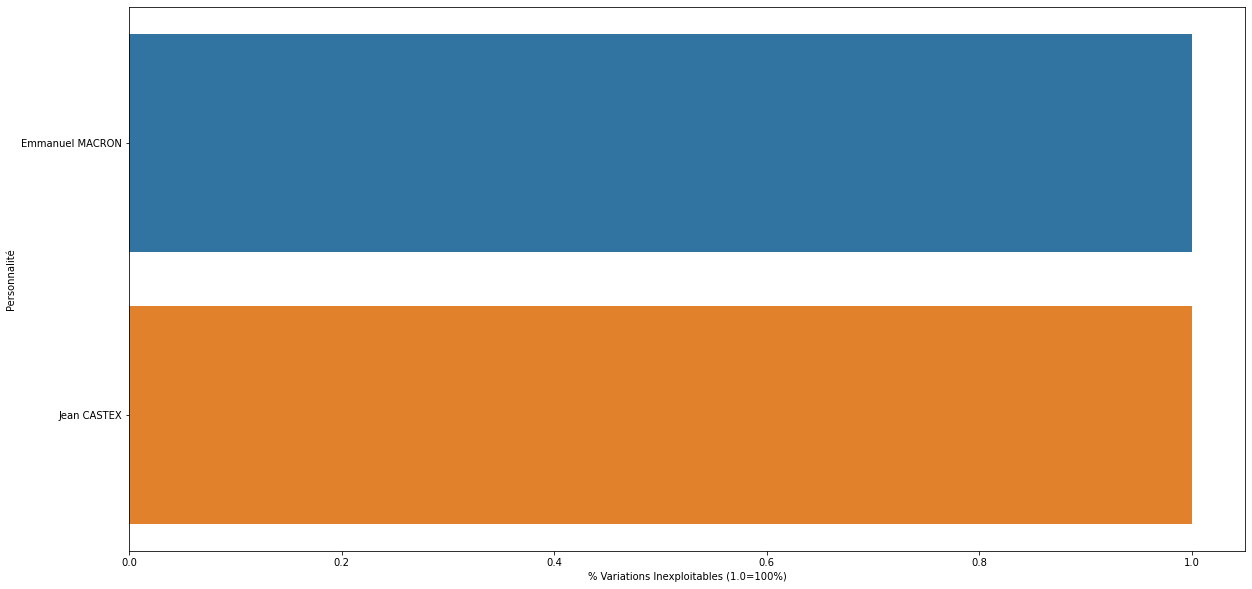

In [45]:
last_inex_ens=last_inex[last_inex.Categorie=='ENSEMBLE']
fig = plt.figure(figsize=(20,10))
ax=sns.barplot(x='Inexploitable',y='Nom',data=last_inex_ens,ci=None
#  ,estimator=lambda x: len(x) / len(df_inex[df_inex.Categorie=='ENSEMBLE']) * 100
)
ax.set(xlabel="% Variations Inexploitables (1.0=100%)")
ax.set(ylabel="Personnalité ")
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

fig.savefig('plot.png')

In [46]:
print(last_inex_ens['Inexploitable'].value_counts()/len(last_inex_ens))
print(last_inex_ens['Inexploitable'].value_counts())

True    1.0
Name: Inexploitable, dtype: float64
True    4
Name: Inexploitable, dtype: int64


## Variation d'une personnalité sur les deux derniers jeux de données

In [47]:
nom="Emmanuel MACRON"
short_d=data_f[(data_f.Nom==nom) & ((data_f.Date==most_recent) | (data_f.Date==scd_most_recent)) & (data_f.Groupe=='Rural')].sort_values(by='Date',ascending=True,ignore_index=True)
print('Favorable')
print((margin_p(short_d['ST Favorable']/100,short_d.Base)*100).T)
print('Défavorable')
print((margin_p(short_d['ST Défavorable']/100,short_d.Base)*100).T)
short_d

Favorable
[]
Défavorable
[]


,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable


In [48]:
data_f[(data_f.Nom==nom) & (data_f.Date==most_recent) & (data_f['Inexploitable Favorable']==False)]

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable


# Dernière variation observable

In [49]:
nom='Emmanuel MACRON'

def find_last_var(df):
    last_var={}
    for nom in df.Nom.unique():
        last_var[nom]={'fav':None,'defav':None,'date_fav':None,'date_defav':None}
        df_var=df[(df.Nom==nom) & (df.Categorie=='ENSEMBLE')]
        df_var=df_var.sort_values(by='Date',ascending=False,ignore_index=True)
        l_base=df_var.iloc[0].Base
        l_fav=df_var.iloc[0]['ST Favorable']
        l_defav=df_var.iloc[0]['ST Défavorable']
        er_l_fav=error_p(l_fav/100,l_base)*100
        er_l_defav=error_p(l_defav/100,l_base)*100
        for i in range(1,len(df_var)):
            t=df_var.iloc[i]
            t_base=t.Base
            t_fav=t['ST Favorable']
            t_defav=t['ST Défavorable']
            er_t_fav=error_p(t_fav/100,t_base)*100
            er_t_defav=error_p(t_defav/100,t_base)*100
            # print(l_fav,er_l_fav,t_fav,er_t_fav)
            if l_fav+er_l_fav < t_fav-er_t_fav and last_var[nom]['fav']==None:
                last_var[nom]['fav']= t_fav-er_t_fav-(l_fav+er_l_fav)
                last_var[nom]['date_fav']= t.Date                
            elif l_fav-er_l_fav > t_fav+er_t_fav and last_var[nom]['fav']==None:
                last_var[nom]['fav']= l_fav+er_l_fav-(t_fav-er_t_fav)
                last_var[nom]['date_fav']= t.Date                
            if l_defav+er_l_defav < t_defav-er_t_defav and last_var[nom]['defav']==None:
                last_var[nom]['defav']= t_defav-er_t_defav-(l_defav+er_l_defav)
                last_var[nom]['date_defav']= t.Date                
            elif l_defav-er_l_defav > t_defav+er_t_defav and last_var[nom]['defav']==None:
                last_var[nom]['defav']= l_defav+er_l_defav-(t_defav-er_t_defav)
                last_var[nom]['date_defav']= t.Date                
    return last_var

In [50]:
last_var=find_last_var(data_f)

## Verification pas de données bizarre

In [51]:
data_f[data_f.Base==0]



,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable


In [52]:
favUnmatch=data_f[np.abs(data_f['Très favorable']+data_f['Plutôt favorable']-data_f['ST Favorable'])>0.11]
favUnmatch

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable


In [53]:
defavUnmatch=data_f[np.abs(data_f['Très défavorable']+data_f['Plutôt défavorable']-data_f['ST Défavorable'])>0.11]
defavUnmatch

,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable


In [54]:
unmatch=data_f[np.abs(data_f['ST Favorable']+data_f['ST Défavorable']+data_f['Nsp'])<99.89]
unmatch



,Nom,Categorie,Groupe,Base,Très favorable,Plutôt favorable,ST Favorable,Plutôt défavorable,Très défavorable,ST Défavorable,Nsp,Evolution ST Favorable,Evolution ST Défavorable,Date,Inexploitable Favorable,Inexploitable Défavorable,Erreur Th Favorable,Erreur Th Défavorable


In [55]:
dates=np.sort(data_f.Date.unique())
last_date=dates[len(dates)-1]
prev_date=dates[len(dates)-2]
l_data=data_f[data_f.Date==last_date]
p_data=data_f[data_f.Date==prev_date]

l_data['Prev_calc']=l_data['ST Favorable']-l_data['Evolution ST Favorable']
check_cond=(l_data.Nom==p_data.Nom) & (l_data.Categorie==p_data.Categorie) & (l_data.Groupe==p_data.Groupe)
l_data['Prev']= p_data['ST Favorable']
weird=l_data[np.abs(l_data['Prev'] - l_data['Prev_calc'])> 0.11]
weird


ValueError: Can only compare identically-labeled Series objects

In [208]:
for i in weird.index:
    print(p_data.loc[i ])